<a href="https://colab.research.google.com/github/soumybisht1242/Time_series_forecasting/blob/main/Time_series_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/MaunaLoaDailyTemps.csv', index_col='DATE', parse_dates=True)
df=df.dropna()
print('Shape of data', df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
01-01-2014,33.0,46.0,40.0,657,1756
02-01-2014,35.0,50.0,43.0,657,1756
03-01-2014,36.0,45.0,41.0,657,1757
04-01-2014,32.0,41.0,37.0,658,1757
05-01-2014,24.0,38.0,31.0,658,1758


<Axes: xlabel='DATE'>

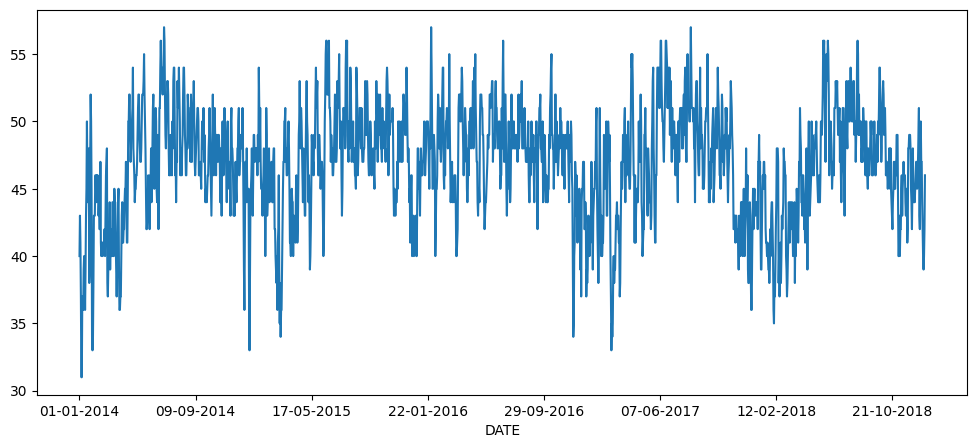

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest=adfuller(dataset, autolag='AIC')
  print('1. ADF : ', dftest[0])
  print('2. P-Value : ', dftest[1])
  print('3. Num of Lags : ', dftest[2])
  print('4. Num of Observations Used for ADF Regression and Critical Values Calculation : ', dftest[3])
  print('5. Critical Values : ')
  for key, value in dftest[4].items():
    print('\t', key, ' : ', value)

In [ ]:
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num of Lags :  12
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  1808
5. Critical Values : 
	 1%  :  -3.433972018026501
	 5%  :  -2.8631399192826676
	 10%  :  -2.5676217442756872


In [ ]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=4.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=3.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=4.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=5.77 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=3.88 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=5.51 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=5.88 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=5.64 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=7.02 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Fri, 28 Jun 2024   AIC                           8295.034
Time:                        13:01:29   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [ ]:
model=ARIMA(train['AvgTemp'], order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 28 Jun 2024   AIC                           8156.395
Time:                        13:44:37   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end)
pred.index=df.index[start:end+1]
print(pred)

DATE
01-12-2018    44.754109
02-12-2018    44.987795
03-12-2018    45.388741
04-12-2018    45.721545
05-12-2018    45.863733
06-12-2018    45.874126
07-12-2018    45.884370
08-12-2018    45.894466
09-12-2018    45.904417
10-12-2018    45.914225
11-12-2018    45.923891
12-12-2018    45.933418
13-12-2018    45.942808
14-12-2018    45.952063
15-12-2018    45.961185
16-12-2018    45.970175
17-12-2018    45.979036
18-12-2018    45.987769
19-12-2018    45.996377
20-12-2018    46.004861
21-12-2018    46.013222
22-12-2018    46.021463
23-12-2018    46.029586
24-12-2018    46.037591
25-12-2018    46.045481
26-12-2018    46.053258
27-12-2018    46.060923
28-12-2018    46.068477
29-12-2018    46.075922
30-12-2018    46.083261
Name: predicted_mean, dtype: float64


<Axes: xlabel='DATE'>

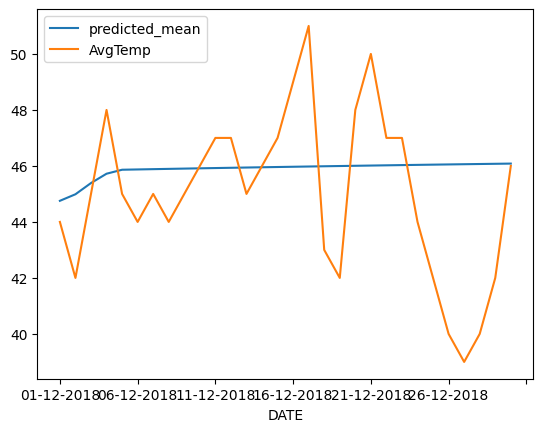

In [ ]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671


In [ ]:
model12=ARIMA(df['AvgTemp'], order=(1,0,5))
model12=model12.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
26-12-2018,35.0,45.0,40.0,654,1752
27-12-2018,33.0,44.0,39.0,655,1752
28-12-2018,33.0,47.0,40.0,655,1753
29-12-2018,36.0,47.0,42.0,655,1753
30-12-2018,39.0,52.0,46.0,656,1754


In [ ]:
index_future_dates=pd.date_range(start='30-12-2018', end='29-01-2019')
pred=model12.predict(start=len(df), end=len(df)+30, typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates

<Axes: >

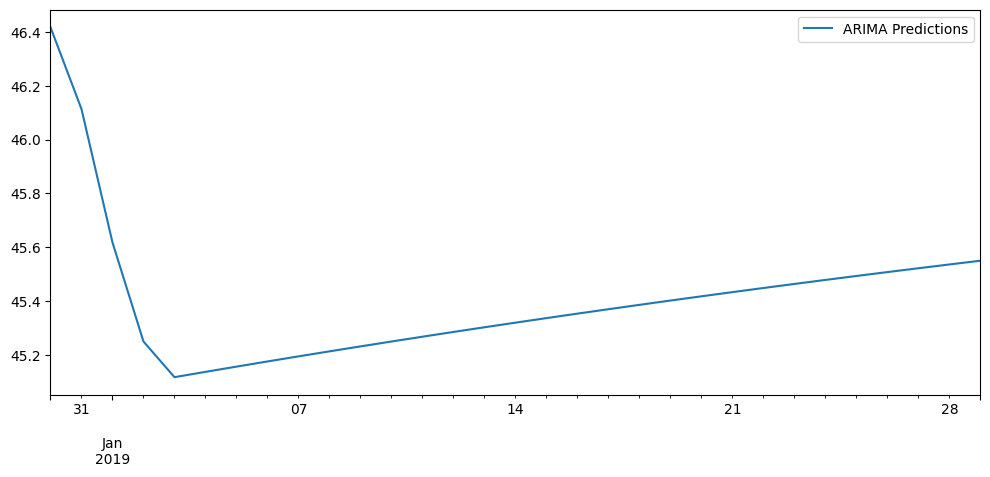

In [ ]:
pred.plot(figsize=(12,5),legend=True)